## Kaggle Housing Price Prediction 

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

### Loading of Data & Exploratory Data Analysis

In [17]:
train_df = pd.read_csv("../train.csv")
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
nans = train_df.isna().sum()

for col, count in nans.items():
    if count > 0:
        print(col, count)

LotFrontage 259
Alley 1369
MasVnrType 872
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


From data_description.txt we see that NaN values are in most cases the feature not existing in that certain house so we can replace those NaNs with our own features

In [20]:
#fill numerical columns with median
train_df["LotFrontage"] = train_df["LotFrontage"].fillna(train_df["LotFrontage"].median())
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].median())
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(train_df["GarageYrBlt"].median())

In [21]:
#fill categorical columns with our own features for non existent property characteristic or with mode

for col, val in {
    'Alley': 'NoAlley',
    'MasVnrType': 'None',
    'BsmtQual': 'NoBsmt',
    'BsmtCond': 'NoBsmt',
    'BsmtExposure': 'NoBsmt',
    'BsmtFinType1': 'NoBsmt',
    'BsmtFinType2': 'NoBsmt',
    'Electrical': train_df['Electrical'].mode()[0],
    'FireplaceQu': 'NoFireplace',
    'GarageType': 'NoGarage',
    'GarageFinish': 'NoGarage',
    'GarageQual': 'NoGarage',
    'GarageCond': 'NoGarage',
    'PoolQC': 'NoPool',
    'Fence': 'NoFence',
    'MiscFeature': 'None'
}.items():
    train_df[col] = train_df[col].fillna(val)

In [22]:
nans = train_df.isna().sum()

for col, count in nans.items():
    if count > 0:
        print(col, count)

No more NaN values in the dataframe

In [23]:
#for regression, values need to be encoded
num_cols = train_df.select_dtypes(["float64","int64"]).columns
cat_cols = train_df.select_dtypes(["object","category"]).columns
#print(num_cols)
#print(cat_cols)

In [24]:
#encode categorical columns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cat = encoder.fit_transform(train_df[cat_cols])
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols))
encoded_df.info() #all are now float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 266 entries, MSZoning_C (all) to SaleCondition_Partial
dtypes: float64(266)
memory usage: 3.0 MB


In [25]:
y_log_df = np.log1p(train_df["SalePrice"]) #get y so it is not standardised later
y_df = train_df["SalePrice"]

In [26]:
scaler = StandardScaler()
scaled_num = scaler.fit_transform(train_df[num_cols])
scaled_df = pd.DataFrame(scaled_num, columns=num_cols)

In [27]:
clean_train_df = pd.concat([encoded_df,scaled_df],axis=1)
clean_train_df["SalePrice_Log"] = y_log_df
clean_train_df["SalePrice"] = y_df

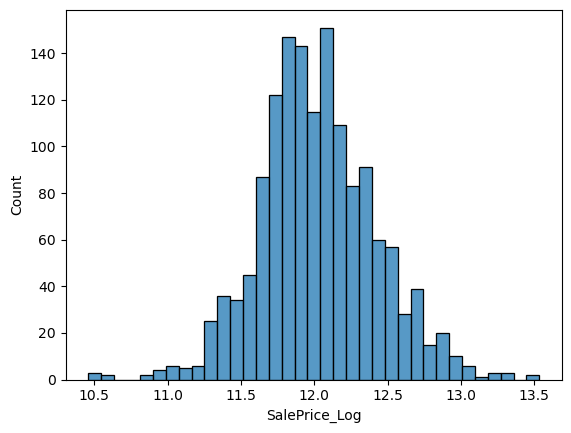

In [28]:

sns.histplot(x=clean_train_df["SalePrice_Log"])

plt.show()
#right skewed so long tail with expensive houses, use log to transform and later undo for the prediction

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNetCV

y = clean_train_df["SalePrice_Log"]
X = clean_train_df.drop(columns=["SalePrice","SalePrice_Log"])

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

elastic_model = ElasticNetCV(alphas=[0.001,0.01,0.1,1,10],l1_ratio=[0.01,0.1,0.5,0.9],random_state=42,max_iter=10000)
kf = KFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(
    elastic_model,
    X, y,
    cv=kf,
    scoring="neg_mean_squared_error"
)

print("RMSE scores for each fold:", np.sqrt(-scores))
print(f"Mean RMSE: {np.mean(np.sqrt(-scores)):.4f}")
print(f"Std of RMSE: {np.std(np.sqrt(-scores)):.4f}")
#add R2 for this as well?


elastic_model.fit(X_test, y_test)

y_pred_test = elastic_model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE: {rmse_test:.4f}")
print(f"R2{r2_score(y_test, y_pred_test):.4f}")


#still need to fixdata öleaking issue wih standardising on whole dataset

RMSE scores for each fold: [0.110024   0.13961271 0.11594889 0.13281266 0.16223793 0.24396347
 0.13676934 0.09988667 0.12733518 0.08790127]
Mean RMSE: 0.1356
Std of RMSE: 0.0414
Test RMSE: 0.0819
R20.9641


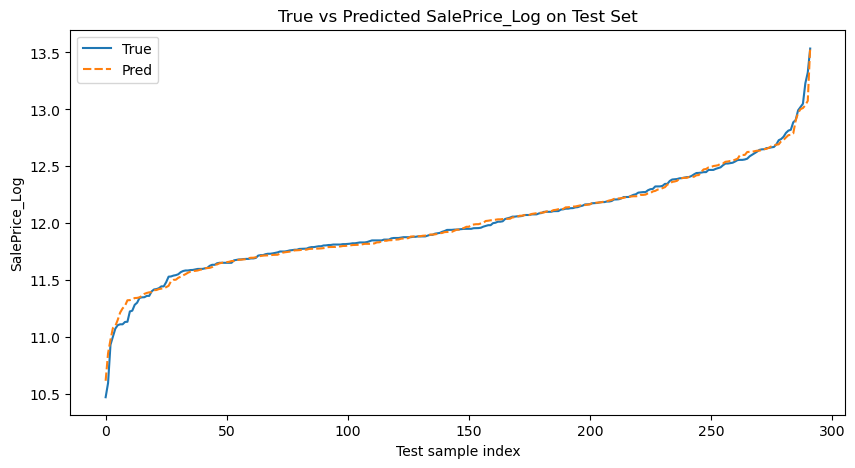

In [37]:
# plot true vs predicted (same sns plot)
ordered_y_test = sorted(y_test)
ordered_y_pred_test = sorted(y_pred_test)
df_cmp = pd.DataFrame({"True": ordered_y_test, "Pred": ordered_y_pred_test})
plt.figure(figsize=(10,5))
sns.lineplot(data=df_cmp)
plt.xlabel("Test sample index")
plt.ylabel("SalePrice_Log")
plt.title("True vs Predicted SalePrice_Log on Test Set")
plt.legend(title="")
plt.show()

Create Function for Submission and prediction on the test set

In [30]:
def preprocessing(csv_file_path):
    df=pd.read_csv(csv_file_path)
    nans = df.isna().sum()
    for col, count in nans.items():
        if count > 0:
            print(col, count)
    #fill numerical columns with median
    df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].median())
    df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].median())
    df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].median())
    for col, val in {
            'Alley': 'NoAlley',
            'MasVnrType': 'None',
            'BsmtQual': 'NoBsmt',
            'BsmtCond': 'NoBsmt',
            'BsmtExposure': 'NoBsmt',
            'BsmtFinType1': 'NoBsmt',
            'BsmtFinType2': 'NoBsmt',
            'Electrical': df['Electrical'].mode()[0],
            'FireplaceQu': 'NoFireplace',
            'GarageType': 'NoGarage',
            'GarageFinish': 'NoGarage',
            'GarageQual': 'NoGarage',
            'GarageCond': 'NoGarage',
            'PoolQC': 'NoPool',
            'Fence': 'NoFence',
            'MiscFeature': 'None'
        }.items():  
        df[col] = df[col].fillna(val)
    for col, count in nans.items():
        if count > 0:
            print(col, count)
    num_cols = df.select_dtypes(["float64","int64"]).columns
    cat_cols = df.select_dtypes(["object","category"]).columns
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_cat = encoder.fit_transform(df[cat_cols])
    encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols))
    y_log_df = np.log1p(df["SalePrice"]) #get y so it is not standardised later
    y_df = df["SalePrice"]    
    scaler = StandardScaler()
    scaled_num = scaler.fit_transform(df[num_cols])
    scaled_df = pd.DataFrame(scaled_num, columns=num_cols) 
    clean_df = pd.concat([encoded_df,scaled_df],axis=1)
    clean_df["SalePrice_Log"] = y_log_df
    clean_df["SalePrice"] = y_df
    return clean_df
    
    
            

            

    